# Model mit einer LATENTEN VARIABLE

In [1]:
import sumProduct as sp
import numpy as np
import graphviz as gp
import matplotlib.pyplot as plt
import subprocess

In [2]:
prior=sp.freeEnergyFactorNode()
var=sp.variableNode(name='var',vrange=['pain','nopain'])
prior.addNeighbour(var)

def exprior(condrv,conditioners):
    if condrv[0] is None:
        return 1000.0
    if condrv[0]=='nopain':
        return 0.2
    if condrv[0]=='pain':
        return 0.8
    
prior.setPrior(exprior)
prior.predictFactor()
allNodes=[var,prior]

In [3]:
prior.pseudoCounts

{(None,): 1000.0}

In [4]:
sens=sp.variableNode(name='Sensation',vrange=('noci','tickle'))
variable=[sens,var]
senstovar=sp.freeEnergyFactorNode()
senstovar.addNeighbour(sens,isConditioner=False)
senstovar.addNeighbour(var,isConditioner=True)

In [5]:
outf=open("Latent.dot","w")
outf.write(prior.dotPrint())
outf.close()
subprocess.call("neato -T png -o Latent.png Latent.dot", shell=True)

1

In [6]:
def sensprior(condrv,conditioners):
    if condrv[0] is None:
        return 500.0
    if conditioners[0]=='pain':
        if condrv[0]=='noci':
            return 0.5
        if condrv[0]=='tickle':
            return 0.5
    if conditioners[0]=='nopain':
        if condrv[0]=='tickle':
            return 0.5
        if condrv[0]=='noci':
            return 0.5
senstovar.setPrior(sensprior)  
allNodes+=sens,senstovar
allNodes

In [7]:
prior.pseudoCounts

{(None,): 1000.0}

In [8]:
NP_ppain_noci=[]
NP_ppain_tickle=[]
NP_pnopain_noci=[]
NP_pnopain_tickle=[]
PCpain=[]
PCnopain=[]
Prior_PC_pain=[]
Prior_PC_nopain=[]
Prior_NP_pain=[]
Prior_NP_nopain=[]

In [9]:
for trial in range(30): 
    sp.startLearning(allNodes)
    sens.observe('noci')
    sp.runSumProduct(allNodes)
    sp.accumulateEvidence(allNodes)
    sp.learn(allNodes)
    NP_ppain_noci.append(senstovar.naturalParams[(('noci',), ('pain',))])
    NP_ppain_tickle.append(senstovar.naturalParams[(('tickle',), ('pain',))])
    NP_pnopain_noci.append(senstovar.naturalParams[(('noci',), ('nopain',))])
    NP_pnopain_tickle.append(senstovar.naturalParams[(('tickle',),('nopain',))])
    PCpain.append(senstovar.pseudoCounts[('pain',)])
    PCnopain.append(senstovar.pseudoCounts[('nopain',)])
    Prior_PC_pain.append(prior.pseudoCounts[(None,)])
    Prior_PC_nopain.append(prior.pseudoCounts[()])
    Prior_NP_pain.append(prior.naturalParams[(('pain',), (None,))])
    Prior_NP_nopain.append(prior.naturalParams[(('nopain',), (None,))])
for trial in range(30):
    sp.startLearning(allNodes)
    sens.observe('tickle')
    sp.runSumProduct(allNodes)
    sp.accumulateEvidence(allNodes)
    sp.learn(allNodes)
    NP_ppain_noci.append(senstovar.naturalParams[(('noci',), ('pain',))])
    NP_ppain_tickle.append(senstovar.naturalParams[(('tickle',), ('pain',))])
    NP_pnopain_noci.append(senstovar.naturalParams[(('noci',), ('nopain',))])
    NP_pnopain_tickle.append(senstovar.naturalParams[(('tickle',),('nopain',))])
    PCpain.append(senstovar.pseudoCounts[('pain',)])
    PCnopain.append(senstovar.pseudoCounts[('nopain',)])
    #Prior_PC_pain.append(prior.pseudoCounts[(None,)])
    Prior_PC_nopain.append(prior.pseudoCounts[()])
    Prior_NP_pain.append(prior.naturalParams[(('pain',), (None,))])
    Prior_NP_nopain.append(prior.naturalParams[(('nopain',), (None,))])

starting learning for 4 nodes
Runing Sum-product
accumulating evidence for 4 nodes
learning for 4 nodes
starting learning for 4 nodes
Runing Sum-product
accumulating evidence for 4 nodes
learning for 4 nodes
starting learning for 4 nodes
Runing Sum-product
accumulating evidence for 4 nodes
learning for 4 nodes
starting learning for 4 nodes
Runing Sum-product
accumulating evidence for 4 nodes
learning for 4 nodes
starting learning for 4 nodes
Runing Sum-product
accumulating evidence for 4 nodes
learning for 4 nodes
starting learning for 4 nodes
Runing Sum-product
accumulating evidence for 4 nodes
learning for 4 nodes
starting learning for 4 nodes
Runing Sum-product
accumulating evidence for 4 nodes
learning for 4 nodes
starting learning for 4 nodes
Runing Sum-product
accumulating evidence for 4 nodes
learning for 4 nodes
starting learning for 4 nodes
Runing Sum-product
accumulating evidence for 4 nodes
learning for 4 nodes
starting learning for 4 nodes
Runing Sum-product
accumulating ev

In [10]:
# Pseudocounts des Prior
# plt.figure(figsize=(10.0,8.0))
# plt.title("Pseudocount of Prior in Latent Model", fontsize=15)
# plt.suptitle(r'Observations: 30x Noci, 30x Tickle')
# plt.plot(Prior_PC_pain, 'r.',label=r'$\nu$ Pain')
# plt.plot(Prior_PC_nopain, 'y*', label=r'$\nu$ No Pain')
# plt.xlabel("Number of observations")
# plt.ylabel(r'$\nu$',fontsize=18)
# plt.legend(fontsize=14)
# plt.savefig("Latent_Prior_Pseudocount.png")
# plt.show()

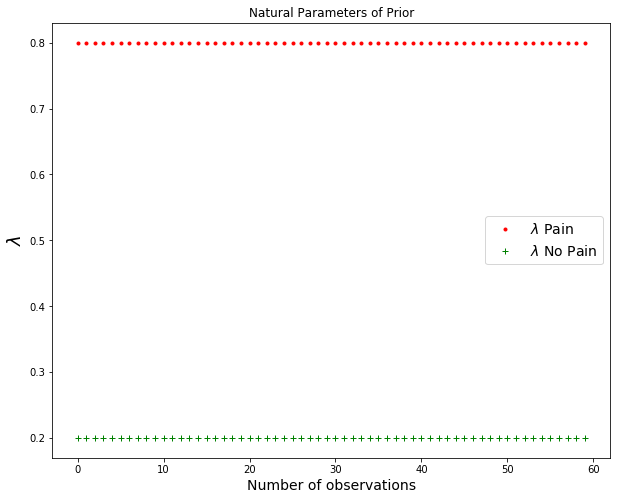

In [11]:
fig=plt.figure(figsize=(10.0,8.0))
plt.title('Natural Parameters of Prior')

plt.plot(Prior_NP_pain, 'r.', label=r'$\lambda$ Pain')
plt.plot(Prior_NP_nopain, 'g+', label=r'$\lambda$ No Pain')
plt.xlabel('Number of observations', fontsize=14)
plt.ylabel(r'$\lambda$', fontsize=18)
plt.legend(fontsize=14)
plt.savefig('Latent_Prior_NatParameters')
plt.show()

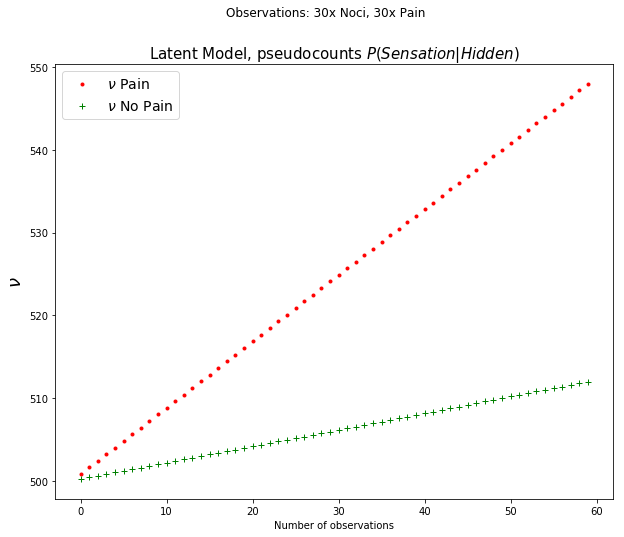

In [12]:
fig1=plt.figure(figsize=(10.0,8.0))
plt.title(r"Latent Model, pseudocounts $P(Sensation | Hidden)$", fontsize=15)
plt.suptitle(r'Observations: 30x Noci, 30x Pain')
plt.plot(PCpain, 'r.',label=r'$\nu$ Pain')
plt.plot(PCnopain, 'g+', label=r'$\nu$ No Pain')
plt.xlabel("Number of observations")
plt.ylabel(r'$\nu$',fontsize=18)
plt.legend(fontsize=14)
plt.savefig("pc_latentmodel_bothprecise.png")
plt.show()

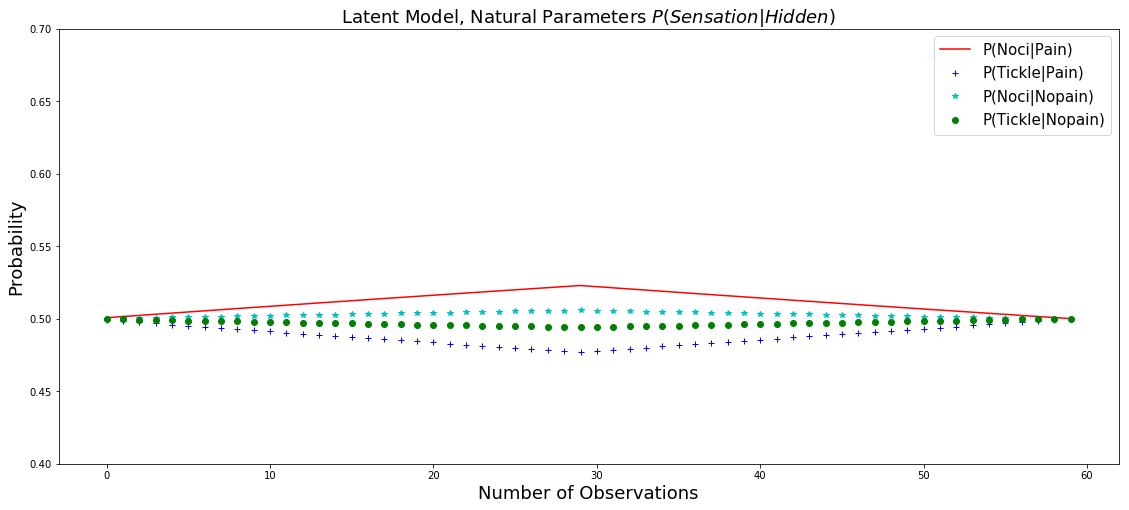

In [15]:

fig2=plt.figure(figsize=(19.0,8.0))
plt.title("Latent Model, Natural Parameters $P(Sensation | Hidden)$", fontsize=18)
axes = plt.gca()
axes.set_ylim([0.4,0.7])
plt.xlabel('Number of Observations', fontsize=18)
plt.ylabel('Probability', fontsize=18)
plt.plot(NP_ppain_noci, 'r-', label="P(Noci|Pain)")
plt.plot(NP_ppain_tickle, 'b+', label="P(Tickle|Pain)")
plt.plot(NP_pnopain_noci, 'c*', label="P(Noci|Nopain)")
plt.plot(NP_pnopain_tickle, 'go', label="P(Tickle|Nopain)")
plt.legend(fontsize=15)
plt.savefig("Prior_Nopain=0.5_Transprobs=0.9PpNoci_0.1NPnoci.png")
plt.show()

In [14]:
for v in variable: 
    print(v.marginal())

({'noci': 0.0, 'tickle': 1.0}, 0.4992854934426555)
({'pain': 0.8000368902166121, 'nopain': 0.1999631097833879}, 0.4992854934426555)
